In [1]:
!pip install textacy

     |████████████████████████████████| 184kB 5.7MB/s 
     |████████████████████████████████| 102kB 11.1MB/s 
     |████████████████████████████████| 1.9MB 16.4MB/s 
     |████████████████████████████████| 481kB 43.6MB/s 
  Created wheel for cytoolz: filename=cytoolz-0.11.0-cp36-cp36m-linux_x86_64.whl size=1225577 sha256=ed59640722779748b4b11d42f5e70d57e380c6a0298e6a65c2609207ecdfb9d2
  Stored in directory: /root/.cache/pip/wheels/a1/32/3c/9c9926b510647cacdde744b2c7acdf1ccd5896fbb7f8d5df0c
Successfully built cytoolz


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

In [4]:
os.chdir("drive/My Drive/thesis_work/analysis/datasets")

In [5]:
import pandas as pd

df = pd.read_csv("rq1AccResps.csv")
df.head()

,Unnamed: 0,usertoken,date,inst_credibleCertainChoice,inst_credibleCertainUncertainty,inst_nCredibleNCertain,inst_nCredibleNCertainUncertainty,preq_gender,preq_race,preq_education,preq_age,postq_economic,postq_social,postq_attention1,postq_attention2,account_index,condition_account,condition_accAlias,condition_block,condition_emotionSort,condition_showImage,condition_credibleLabel,condition_politicalLabel,count_tweets,sourceComment,credibility_choice,credibility_uncertainty,credibility_time,politicalOrientation_choice,politicalOrientation_uncertainty,politicalOrientation_time,credibility_choice_binary,accuracy,condition_showImage_cat
0,0,MFBfaMCt,09/10/20,0.996519,0.977826,0.010491,0.991845,Female,White/Caucasian/European,High School,20,Slightly Conservative,Moderate,Call the employer and tell them about my curre...,Stand and wait for the cashier to come to the ...,0,CNNPolitics,G,True,angry,True,1,left,5,NaN,0.244812,0.254008,1.599774e+12,0.635058,0.392994,1.599774e+12,0,False,with image
1,1,MFBfaMCt,09/10/20,0.996519,0.977826,0.010491,0.991845,Female,White/Caucasian/European,High School,20,Slightly Conservative,Moderate,Call the employer and tell them about my curre...,Stand and wait for the cashier to come to the ...,1,amlookout,B,True,angry,False,0,right,5,NaN,0.134582,0.067097,1.599774e+12,0.984918,1.898651,1.599774e+12,0,True,without image
2,2,MFBfaMCt,09/10/20,0.996519,0.977826,0.010491,0.991845,Female,White/Caucasian/European,High School,20,Slightly Conservative,Moderate,Call the employer and tell them about my curre...,Stand and wait for the cashier to come to the ...,2,veteranstoday,A,True,angry,False,0,left,7,NaN,0.254398,0.201290,1.599774e+12,-0.002359,0.498431,1.599774e+12,0,True,without image
3,3,MFBfaMCt,09/10/20,0.996519,0.977826,0.010491,0.991845,Female,White/Caucasian/European,High School,20,Slightly Conservative,Moderate,Call the employer and tell them about my curre...,Stand and wait for the cashier to come to the ...,3,Jerusalem_Post,H,True,angry,True,1,right,7,NaN,0.436517,0.311520,1.599774e+12,0.103079,0.431335,1.599774e+12,0,False,with image
4,4,MFBfaMCt,09/10/20,0.996519,0.977826,0.010491,0.991845,Female,White/Caucasian/European,High School,20,Slightly Conservative,Moderate,Call the employer and tell them about my curre...,Stand and wait for the cashier to come to the ...,4,nypost,F,True,angry,False,1,right,6,NaN,0.515595,0.244423,1.599774e+12,-0.218026,1.265248,1.599774e+12,1,True,without image


In [6]:
df = df.dropna(subset=['sourceComment'])
df.shape

(527, 34)

In [7]:
df.groupby(["usertoken"])["date"].count()

usertoken
3V8RF3sh    8
68ZAZ1l8    8
6bhDcuBP    8
8hmn3Irt    8
94CdIm2s    8
           ..
xMeIBB9r    8
y6L4OB3h    3
yJ7MWlkw    8
yzE74Ra0    8
zHeu2zVE    5
Name: date, Length: 72, dtype: int64

In [8]:
nadf = pd.isna(df['sourceComment'])
df['sourceComment'][90:100]

125    Some tweets seemed sarcastic and were mocking ...
126    Would talk badly about the opposing political ...
127    derogative remarks makes me believe they disli...
128    one of the tweets did not "insult" trumps posi...
129    Brings up democrats for positive tweets but br...
130    Brought up Jewish news a lot so not sure which...
131    Showing pictures of the President that did not...
132    Having tweets that were coming at the credibil...
133    There wasn't really a political stance these t...
134       Did not take a political stance on most issues
Name: sourceComment, dtype: object

In [9]:
texts = [_ for _ in df['sourceComment'] if pd.notnull(_)] 
len(texts)

527

In [10]:
import spacy
import textacy

In [11]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9MB 1.2MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp36-none-any.whl size=829180944 sha256=a439eff5cb97c383e06b34342b9ae5113a89f6af1733c14063ec6a4b8f6c37d9
  Stored in directory: /tmp/pip-ephem-wheel-cache-ffyr4qk2/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [12]:
!python -m spacy link en_core_web_lg enn

✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_lg -->
/usr/local/lib/python3.6/dist-packages/spacy/data/enn
You can now load the model via spacy.load('enn')


In [13]:
num = 200
en = textacy.load_spacy_lang("enn") #, disable=("parser",)
doc = textacy.make_spacy_doc(texts[num], lang=en)
doc._.preview

'Doc(25 tokens: "Tweets from this source seem more "cut and dry"...")'

In [ ]:
# # ## add in metadata

# metadata = {
#     "Condition": df.condition,
#     "ConditionPerson": df.condition_person,
#     "EconomicPostQ": df.postq_economic,
#     "SocialPostQ": df.postq_social
# }

# for text in texts:
#     doc = textacy.make_spacy_doc((text, metadata), lang=en)

In [ ]:
# angryRight = df[(df["condition_emotionSort"] == "angry")&(df["condition_politicalLabel"] == "right")]

In [ ]:
# for i,row in angryRight[angryRight["condition_showImage"]==True].sort_values("credibility_choice",ascending=True).iterrows():
#   print(row["sourceComment"])
#   print(row["credibility_choice"])
#   print("------")

In [14]:
import textacy.vsm 

corpus = textacy.corpus.Corpus(lang=en, data=texts) #data=texts
#corpus.save("textacy_corpus.bin.gz")

word_counts = corpus.word_counts(as_strings=True)

sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:25]

[('-PRON-', 684),
 ('tweet', 317),
 ('source', 127),
 ('credible', 126),
 ('right', 99),
 ('account', 95),
 ('like', 86),
 ('political', 86),
 ('use', 75),
 ('biased', 75),
 ('bias', 73),
 ('lean', 67),
 ('Trump', 66),
 ('fact', 61),
 ('word', 54),
 ('information', 51),
 ('opinion', 49),
 ('left', 48),
 ('news', 47),
 ('leave', 47),
 ('believe', 39),
 ('think', 36),
 ('image', 36),
 ('credibility', 35),
 ('language', 33)]

In [15]:
doc_counts = corpus.word_doc_counts(as_strings=True)

sorted(doc_counts.items(), key=lambda x: x[1], reverse=True)[:5]

[('-PRON-', 327),
 ('tweet', 247),
 ('credible', 114),
 ('source', 101),
 ('right', 95)]

In [16]:
corpus.n_docs, corpus.n_sents, corpus.n_tokens

(527, 893, 13311)

### Get Keywords

In [ ]:
import textacy.ke

min_rank = 0.001

kw = (textacy.ke.textrank(doc, normalize="lower", window_size=2, edge_weighting="binary", topn=500) for doc in corpus)

kw_dict = {}

for index, k in enumerate(kw):
    k2 = [i for i in k ] # if i[1] > min_rank
    kw_dict.update({index: k2})

In [ ]:
len(kw_dict)

527

In [ ]:
s = set()

for keys, i in kw_dict.items():
#    print(i)
    for j in i:
        s.add(j[0])
        
len(s)

1042

In [ ]:
s

{'embarrassing',
 'facial images',
 'anti',
 'variety',
 'nonsense information',
 'outside sources',
 'personal biased opinions',
 'corrupt',
 'vindictive',
 'united states',
 'russia',
 'democratic candidates',
 'esque titles',
 'praise',
 'republican',
 'opinion',
 'opinionated tweets',
 'matter',
 'politicized',
 'report',
 'blowhard',
 'factual references',
 'factual evidence',
 'non biased tweets',
 'caps',
 'story',
 'certain images',
 'jewish heritage',
 'local crime',
 'hand',
 'celebrity lives',
 'quote',
 'heading',
 'professionalism',
 'extreme vocabulary',
 'word choice',
 'doubt',
 'unclear',
 'exaggerated',
 'little biased',
 'support',
 'explanatory information',
 'creditable',
 'bad light',
 'position',
 'wording',
 'affiliations',
 'closer',
 'emails',
 'accusatory',
 'background information',
 'deaths',
 'political opinions',
 'negatives',
 'unsure',
 'loony',
 'event',
 'headliners',
 'treatment',
 'opposition',
 'fact',
 'biased',
 'ed',
 'cnn vibes',
 'month',
 'cr

In [ ]:
#vectorizer.vocabulary_terms

### Vectorizer / DTM

In [17]:
from textacy.vsm import Vectorizer

tokenized_docs = (doc._.to_terms_list(entities=False, as_strings=True, normalize = "lower") for doc in corpus) #  
# do tf-idf
vectorizer = Vectorizer(norm="l2", apply_idf=True, max_df=0.95) # , vocabulary_terms = s, max_df=0.95, min_df=5, norm="l2", apply_idf=True, 
doc_term_matrix = vectorizer.fit_transform(tokenized_docs)
doc_term_matrix

<527x3944 sparse matrix of type '<class 'numpy.float64'>'
	with 7909 stored elements in Compressed Sparse Row format>

In [ ]:
vectorizer.terms_list[49]

'account showed putin'

In [ ]:
def get_col_counts(query, vectorizer, dtm):

    word_idx = vectorizer.vocabulary_terms[query]
    return doc_term_matrix[0:, word_idx]

q = "tweets"

get_col_counts(query = q, vectorizer = vectorizer, dtm = doc_term_matrix)

<527x1 sparse matrix of type '<class 'numpy.float64'>'
	with 224 stored elements in Compressed Sparse Row format>

### Topic Modeling

In [18]:
import textacy.tm

model = textacy.tm.TopicModel("nmf", n_topics=20)
model.fit(doc_term_matrix)
doc_topic_matrix = model.transform(doc_term_matrix)
doc_topic_matrix.shape
topicTermsDict = {}
for topic_idx, top_terms in model.top_topic_terms(vectorizer.id_to_term, top_n=10):
    print("topic", topic_idx, ":", " , ".join(top_terms))
    topicTermsDict[topic_idx] = " , ".join(top_terms[:5])

topic 0 : biased , tweets were biased , appear , tell , lean , information was biased , realised , words , information , think
topic 1 : political , orientation , political orientation , tweets were political , credibility , topic , credibility or political , topics , clue , tweets were based
topic 2 : tweets , based , unbiased , tweets were biased , political , way , writer , found , worded , credible
topic 3 : opinions , presented , facts , opinions presented , accounts , lot , personal , peoples opinions , personal opinions , peoples
topic 4 : facts , stating facts , stating , titles , article titles , like they pull , pull , stated , article , like
topic 5 : pictures , tell , words , pictures influenced , think the pictures , left swinging , swinging , influenced , professional , pictures were bad
topic 6 : source , credible source , credible , overall , opinionated with tweets , think , tweets seemed factual , information , believe , found
topic 7 : bias , credible , report , bias

In [ ]:
topic_labels = {
    0:"biased tweets",
    1:"political orientation",
    2:"biased tweets",
    3:"images and pictures",
    4:"facts",
    5:"pictures",
    6:"credible source",
    7:"biased tweets",
    8:"facts",
    9:"images and pictures",
    10:"news like",
    11:"political orientation",
    12:"non biased",
    13:"subjective tone",
    14:"political orientation",
    15:"specific words",
    16:"their decision",
    17:"clickbait",
    18:"opinionated",
    19:"political orientation",
    20:"what influenced",
    21:"multiple tweets",
    22:"negative to trump",
    23:"negative to democrats",
    24:"unbiased"
}

In [ ]:
doc_term_matrix.shape

(527, 3944)

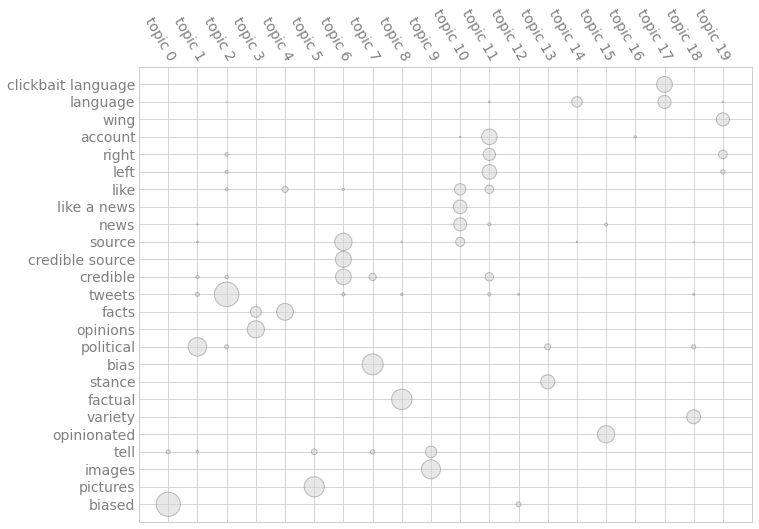

In [19]:
model.termite_plot(doc_topic_matrix, vectorizer.id_to_term,
                   topics=-1,  n_terms=25, sort_terms_by="seriation",save="study1Termite.jpg")

In [20]:
doc_topics = list(model.top_doc_topics(doc_topic_matrix=doc_topic_matrix,docs=-1,top_n=2))

(0, (11, 10))

In [21]:
df[["top_topic","second_top_topic"]] = [i[1] for i in doc_topics]

In [22]:
df["top_topic_terms"] = df["top_topic"].apply(lambda x: topicTermsDict[x])

In [25]:
df.groupby(["top_topic","condition_credibleLabel"],as_index=False).agg({"usertoken":"nunique","date":"count",'top_topic_terms':"first"})

,top_topic,condition_credibleLabel,usertoken,date,top_topic_terms
0,0,0,11,19,"biased , tweets were biased , appear , tell , ..."
1,0,1,7,11,"biased , tweets were biased , appear , tell , ..."
2,1,0,16,22,"political , orientation , political orientatio..."
3,1,1,15,23,"political , orientation , political orientatio..."
4,2,0,17,22,"tweets , based , unbiased , tweets were biased..."
5,2,1,25,31,"tweets , based , unbiased , tweets were biased..."
6,3,0,10,12,"opinions , presented , facts , opinions presen..."
7,3,1,10,12,"opinions , presented , facts , opinions presen..."
8,4,0,13,16,"facts , stating facts , stating , titles , art..."
9,4,1,15,18,"facts , stating facts , stating , titles , art..."


In [ ]:
for comment in df[(df["condition_account"] == "nypost") & (df["condition_emotionSort"] == "angry")]["sourceComment"]:
  print(comment)

Most tweets seemed unbiased but when referencing Trump, the use of quotation marks made it feel more opinion driven. 
The quotes around some words or phrases make the tweet seem ironic or sarcastic which sounds biased
seems like a source trying to report easy news with local crime, etc.
The images made it seem like the writer was expecting the faces of the tweeted individuals would look a certain way. The political orientation seems centered
Many of the headlines are more-or-less straightforward, but some add context or language to influence our ideas (Trump heads to Japan among concerns about N. Korea...). Some of the tweets exist to share the public reaction to the information rather than the information itself.
The poor grammar and choice of words contribute to the lack of credibility of the account. 
There was a variety of tweets mostly not political
Tweets were a mix of both right wing and left wing notions.
This sources used some quotes. It appears to just be stating unbiased new

In [ ]:
for i in model.top_topic_docs(doc_topic_matrix=doc_topic_matrix,topics=-1,top_n=20):
  topic_id = i[0]
  top_terms = list(model.top_topic_terms(vectorizer.id_to_term, top_n=10,topics=topic_id))[0][1]
  print("topic", topic_id, ":", " , ".join(top_terms))
  for doc_id in i[1]:
    row = df.iloc[doc_id]
    print("****")
    print(row["condition_account"])
    print(row["condition_emotionSort"])

    print(row["sourceComment"])

  print("------------------------------------------------------------------")
  print("------------------------------------------------------------------")

topic 0 : biased , tweets were biased , appear , tell , lean , information was biased , realised , words , information , think
****
MotherJones
mixed
They are not very biased
****
Jerusalem_Post
mixed
they are not biased
****
InvestWatchBlog
mixed
not biased
****
amlookout
mixed
not biased
****
veteranstoday
mixed
not biased
****
CNNPolitics
mixed
not biased
****
opednews
happy
They didn't seem very biased in their tweets
****
nypost
happy
Tweets seem more factual again than biased.
****
opednews
mixed
they appear not very biased
****
InvestWatchBlog
angry
Some of the tweets were biased
****
Jerusalem_Post
mixed
These seem biased but I cannot tell what side they lean towards.
****
nypost
mixed
The tweets didn't seem biased, but I wouldn't say it's a credible source. 
****
MotherJones
happy
The account seemed left politically but also biased in many of the opinions in the tweets. Like the last account, some tweets seemed more biased than others. 
****
opednews
angry
Even with no picture

### UMAP on NMF

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
conditions = [_ for _ in df['condition_account']]
ids = [_ for _ in df['usertoken'] + df['condition_account']]

In [ ]:
import umap
mapper = umap.UMAP().fit_transform(doc_topic_matrix)
umap_df = pd.DataFrame(mapper, columns=["X","Y"])
umap_df['color'] = conditions
umap_df['text'] = texts
umap_df['id'] = ids
umap_df.shape

(527, 5)

In [ ]:
umap_df[70:80].head(n=10)

,X,Y,color,text,id
70,18.575459,5.547251,opednews,The vocabulary and types of questions asked se...,iCH8HoPEopednews
71,10.448670,-0.491468,Jerusalem_Post,Facts and statements in titles,iCH8HoPEJerusalem_Post
72,5.351640,3.339810,CNNPolitics,Factual and objective titles,iCH8HoPECNNPolitics
73,5.419244,6.345706,Jerusalem_Post,Seems like the tweets were not very biased and...,94CdIm2sJerusalem_Post
74,3.360088,-0.740020,nypost,The images made it seem like the writer was ex...,94CdIm2snypost
75,7.959276,2.270735,veteranstoday,"Based on the messages of the tweets, the write...",94CdIm2sveteranstoday
76,6.889934,4.198935,MotherJones,"Some of the tweets seemed to be credible, whil...",94CdIm2sMotherJones
77,13.934326,5.153030,InvestWatchBlog,Some of the tweets seemed to be about data rat...,94CdIm2sInvestWatchBlog
78,8.070061,2.548690,amlookout,"the writer seems to be far right, and some of ...",94CdIm2samlookout
79,13.916260,5.272371,CNNPolitics,Many of the tweets seemed to be credible as mo...,94CdIm2sCNNPolitics


In [ ]:
import altair as alt

brush = alt.selection(type='interval')

# nearest = alt.selection(type='single', nearest=True, on='mouseover',
#                         fields=['x','y'], empty='none')

points = alt.Chart(umap_df).mark_point(filled=True, size = 25, opacity= 0.4).encode(
    x='X',
    y='Y',
    #color='black',
    fill=alt.condition(brush, 'color:N', alt.value('grey')),
    #fill='color:N',
    tooltip=["text:N","id"]
).add_selection(brush)

# Base chart for data tables
ranked_text = alt.Chart(umap_df).mark_text().encode(
    y=alt.Y('row_number:O',axis=None)
).transform_window(
    row_number='row_number()'
).transform_filter(
    brush
).transform_window(
    rank='rank(row_number)'
).transform_filter(
    alt.datum.rank<20
)

# Data Tables
text = ranked_text.encode(text='text:N').properties(title='Text')
condition = ranked_text.encode(text='color:N').properties(title='Condition')
#id = ranked_text.encode(text='Origin:N').properties(title='Origin')
text = alt.hconcat(text, condition) # Combine data tables

# Build chart
alt.vconcat(
    points,
    text
).resolve_legend(
    color="independent"
)

alt.VConcatChart(...)